### Augmentation

In [16]:
import scipy.sparse as sp
import numpy as np
import matplotlib.pyplot as plt

rows, cols = 100, 100

density = 0.01  # 1% density

random_sparse_matrix = sp.random(rows, cols, density=density, format='csr', data_rvs=lambda size: np.random.choice([0, 1, 2], size=size), dtype=np.int8)


dense_matrix = np.abs(random_sparse_matrix.toarray())+np.eye(rows,cols, dtype=np.int8)

upper_triangle = np.triu(dense_matrix)

# Create a symmetric matrix by adding its transpose
dense_matrix = upper_triangle + upper_triangle.T - np.diag(np.diag(dense_matrix))

row_sums = np.sum(dense_matrix, axis=1)
col_sums = np.sum(dense_matrix, axis=0)

In [17]:
# preprocessing
#dense_matrix = np.multiply(dense_matrix, 1-np.eye(rows,cols))

### Method 1: Sum of Rows and Columns

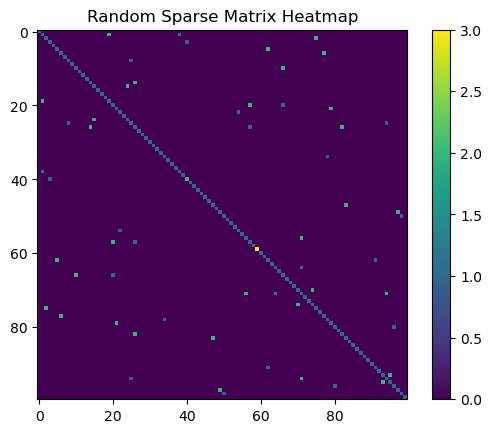

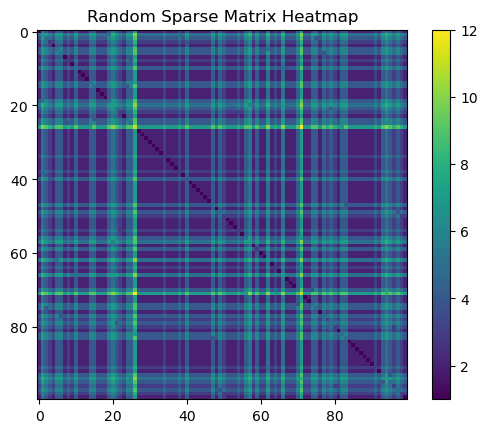

In [18]:
new_dense_matrix = row_sums[:, np.newaxis] + col_sums - dense_matrix

plt.imshow(dense_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Random Sparse Matrix Heatmap')
plt.show()

plt.imshow(new_dense_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Random Sparse Matrix Heatmap')
plt.show()

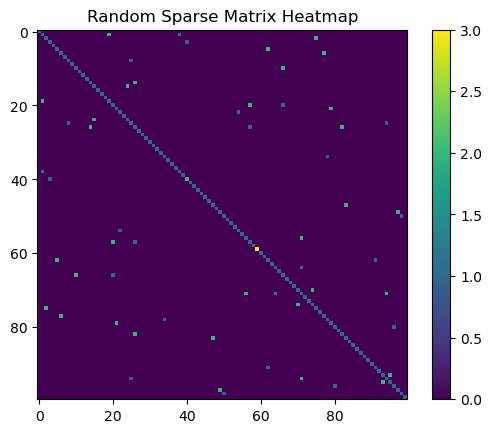

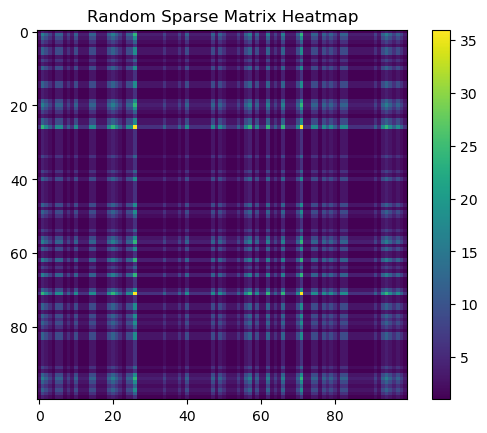

In [19]:
new_dense_matrix = np.matmul(row_sums[:, np.newaxis], col_sums[np.newaxis, :])

plt.imshow(dense_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Random Sparse Matrix Heatmap')
plt.show()

plt.imshow(new_dense_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Random Sparse Matrix Heatmap')
plt.show()

### Random Walk with Restart

In [26]:
p=0.5
c = dense_matrix/np.sum(dense_matrix, axis=1)[:,np.newaxis]
eye = np.eye(rows,cols)
q0 = np.eye(rows,cols)
q1 = (1-p) * np.matmul(q0,c) + p * eye
print(np.linalg.norm(q1-q0,2))

1.5591780936228332


In [27]:
while np.linalg.norm(q1-q0,2)>1e-6:
    q0 = q1.copy()
    q1 = (1-p) * np.matmul(q0,c) + p * eye
    print(np.linalg.norm(q1-q0,2))

0.7841846665388187
0.3866647040388199
0.1994549642827942
0.095727394061444
0.07337666832123843
0.05928255004269964
0.05022851848998172
0.0424684016853653
0.03936196919408109
0.03597777897936187
0.03314307357634276
0.03040458599966936
0.027955930616826753
0.025672482348490913
0.023591275244542263
0.02167071822348178
0.01991039474931201
0.018291016448819815
0.016804297283857406
0.015437895639377025
0.014182828053782232
0.013029657456372879
0.01197030132920407
0.010997037475819482
0.010102917781042692
0.009281484462492093
0.008526841089151336
0.007833551826512335
0.007196631765372641
0.006611496519476068
0.006073936630738578
0.005580083667740542
0.005126384252193324
0.004709573596461436
0.004326652482958406
0.003974865463355046
0.0036516811517532406
0.003354773956403412
0.0030820073765911375
0.002831418616313561
0.0026012044686952317
0.002389708337619338
0.002195408319416961
0.0020169062509076056
0.0018529176490698193
0.0017022624679826214
0.0015638566075606556
0.001436704112498536
0.0013

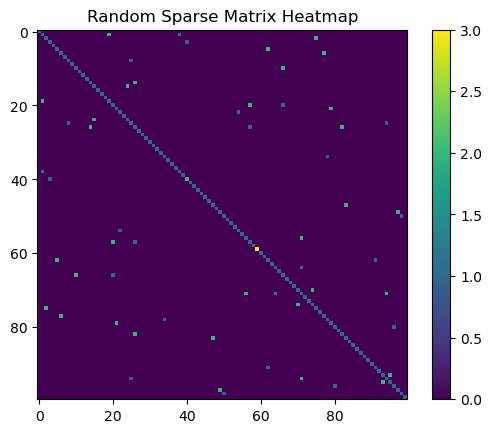

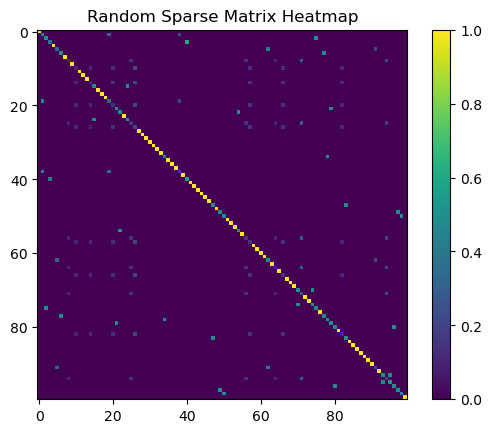

In [28]:
plt.imshow(dense_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Random Sparse Matrix Heatmap')
plt.show()

plt.imshow(q0, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Random Sparse Matrix Heatmap')
plt.show()

In [29]:
np.sum(np.triu(q0) == np.tril(q0).T)

9959